<a href="https://colab.research.google.com/github/lynnlyn620/nyu-python-public-policy/blob/master/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import drive

In [0]:
import matplotlib.pyplot as plt 
import numpy as np

In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,18,21,32,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df.head()

,Unnamed: 0,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
0,0,39888071,08/01/2018 12:00:10 AM,08/01/2018 01:52:46 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Other,10029,200 EAST 109 STREET,EAST 109 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:00:10 AM,The mobile outreach response team offered serv...,08/01/2018 01:52:46 AM,11 MANHATTAN,1.016560e+09,MANHATTAN,1000049.0,228317.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)"
1,1,39889166,08/01/2018 12:00:26 AM,08/18/2018 10:46:43 AM,HPD,Department of Housing Preservation and Develop...,DOOR/WINDOW,DOOR,RESIDENTIAL BUILDING,10031,528 WEST 136 STREET,WEST 136 STREET,NaN,NaN,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,NaN,The Department of Housing Preservation and Dev...,08/18/2018 10:46:43 AM,09 MANHATTAN,1.019880e+09,MANHATTAN,997239.0,238074.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.820124,-73.953071,"(40.82012422332215, -73.9530712339799)"
2,2,39882869,08/01/2018 12:00:54 AM,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)"
3,3,39894246,08/01/2018 12:01:00 AM,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)"
4,4,39881329,08/01/2018 12:01:00 AM,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)"


Step 1. First you will need to prep your data to get the count of complaints in each of the three categories. You can update th**e code from lecture that gets the total count of 311 requests per CD to** instead get the count of 311 requests per CD that meet the criteria for the 3 categories. You should create three seprate dataframes, one per category:

1. complaint_type = 'Noise - Residential'
2. complaint_type = 'HEAT/HOT WATER'
3. Everything else: (complaint_type != 'Noise - Residential' and complaint_type != 'HEAT/HOT WATER')

In [9]:
cb_counts = df.groupby('complaint_type').size().reset_index(name='count_of_311_requests')
cb_counts

,complaint_type,count_of_311_requests
0,APPLIANCE,14629
1,Abandoned Vehicle,9444
2,Advocate - Lien,9
3,Advocate - Other,129
4,Advocate - RPIE,5
5,Advocate-Co-opCondo Abatement,19
6,Advocate-Commercial Exemptions,5
7,Advocate-Personal Exemptions,118
8,Advocate-Prop Refunds/Credits,292
9,Advocate-Property Value,8


In [15]:
df_noise_counts = df[df['complaint_type'] == "Noise - Residential"].groupby('community_board').size().reset_index(name='count_of_noise').sort_values('count_of_noise', ascending=False)
print (df_noise_counts)

     community_board  count_of_noise
50      12 MANHATTAN           11755
28          07 BRONX            9207
12       03 BROOKLYN            7898
42      10 MANHATTAN            7659
16          04 BRONX            7407
20          05 BRONX            6819
17       04 BROOKLYN            6394
13      03 MANHATTAN            6272
51         12 QUEENS            6119
2        01 BROOKLYN            5844
48          12 BRONX            5585
44          11 BRONX            5227
21       05 BROOKLYN            5225
43         10 QUEENS            5213
5   01 STATEN ISLAND            5052
39         09 QUEENS            5048
36          09 BRONX            5037
46      11 MANHATTAN            4953
23         05 QUEENS            4911
54       14 BROOKLYN            4884
58       17 BROOKLYN            4736
4          01 QUEENS            4589
38      09 MANHATTAN            4586
35         08 QUEENS            4429
32          08 BRONX            4406
30      07 MANHATTAN            4297
3

In [27]:
df_heat_hot_water = df[df['complaint_type'] == "HEAT/HOT WATER"].groupby('community_board').size().reset_index(name='count_of_heat_hot_water').sort_values('count_of_heat_hot_water', ascending=False)
print (df_heat_hot_water)

              community_board  count_of_heat_hot_water
49               12 MANHATTAN                    11692
27                   07 BRONX                    11203
15                   04 BRONX                    10942
19                   05 BRONX                     9555
57                17 BROOKLYN                     7737
53                14 BROOKLYN                     7536
41               10 MANHATTAN                     6448
37               09 MANHATTAN                     6322
36                09 BROOKLYN                     6191
47                   12 BRONX                     5566
11                03 BROOKLYN                     5460
35                   09 BRONX                     5426
18                  04 QUEENS                     5373
43                   11 BRONX                     5259
61          Unspecified BRONX                     5177
62       Unspecified BROOKLYN                     5037
23                   06 BRONX                     4944
32        

In [26]:
df_else = df[(df['complaint_type'] != 'HEAT/HOT WATER') & (df['complaint_type'] != "Noise - Residential")].groupby('community_board').size().reset_index(name='count_of_else').sort_values('count_of_else', ascending=False)
print(df_heat_hot_water)

              community_board  count_of_else
23                  05 QUEENS          64641
51                  12 QUEENS          61548
2                 01 BROOKLYN          59389
5            01 STATEN ISLAND          58449
31                  07 QUEENS          58222
50               12 MANHATTAN          57955
4                   01 QUEENS          53370
12                03 BROOKLYN          53002
21                05 BROOKLYN          52407
53                  13 QUEENS          50123
59                18 BROOKLYN          49428
39                  09 QUEENS          47614
15           03 STATEN ISLAND          47333
45                11 BROOKLYN          47279
58                17 BROOKLYN          46391
54                14 BROOKLYN          44774
35                  08 QUEENS          43640
56                15 BROOKLYN          43140
16                   04 BRONX          42737
43                  10 QUEENS          42630
48                   12 BRONX          42537
49        

Step 2. Create a stacked bar chart comprised of three stacked bars. The total height of each bar (the sum of the three stacked bars) should reflect the total count of 311 complaints per CD.
1. number of 'Noise - Residential' complaints per CD
2. number of 'HEAT/HOT WATER' complaints per CD
3. number of other complaints per CD

ValueError: ignored

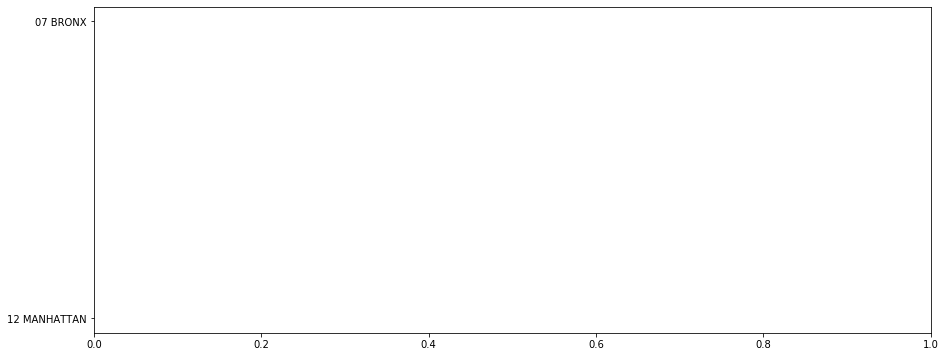

In [36]:
position_on_x = np.arange(len(df_else))
counts = np.array(df_noise_counts.community_board)
counts_hot= np.array(df_heat_hot_water.community_board)
counts_else= np.array(df_else.community_board)
plt.figure(figsize=(15, 6))
plot1 = plt.bar(
  position_on_x,
  counts,
  align='center',
  color='blue',
  label='Noise - Residential'
)
plot2 = plt.bar(
  position_on_x,
  counts_hot,
  bottom=counts, 
  align='center',
  color='cyan',
  label='Heat/Hot Water'
)
plot3 = plt.bar(
  position_on_x,
  counts_else,
  bottom=counts + counts_hot, 
  align='center',
  color='yellow',
  label='else'
)
plt.xticks(position_on_x, df_noise_counts.community_board, rotation=90)

plt.title('Count of complaint type')
plt.xlabel('community board')
plt.ylabel('# of complaint')
plt.legend() # defaults to putting legend in top right

plt.show()

Step 3. Create a scatter plot of community district's 311 counts per category (y-axis) vs. CD population (x-axis). The scatter plot should show each of the three complaint categories in a different color.